In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


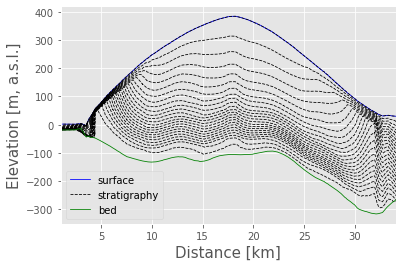

In [34]:
# Add adjusted coordinates

x0, y0 = 950770.0, 1955700.0

fig, ax = plt.subplots()

databed = pd.read_csv('/Users/clara.henry/Documents/Derwael/Data/Contours/ContoursForIGSpresentation/Bed.csv')
for j in list(range(0, 2400, 100)):
    data = pd.read_csv('/Users/clara.henry/Documents/Derwael/Data/Contours/ContoursForIGSpresentation/' + str(j) + '.csv')
    dist = [0] * len(data)
    data['Distance'] = dist
    for i in range(len(data)):
        data['Distance'] = np.sqrt(( data['Points:0'] - x0 )**2.0 + ( data['Points:1'] - y0 )**2.0 )
    data['Distance'] = data['Distance']/1000

    data = data.sort_values('Distance')
    data = data.reset_index(drop=True)

    if j == 0:
        ax.plot(data['Distance'][0:370], data['Points:2'][0:370], color='blue', linewidth=0.8, label='surface')
    if j == 100:
        ax.plot(data['Distance'][0:370], data['Points:2'][0:370], color='black', linewidth=0.8, label='stratigraphy', linestyle='dashed')
    else:
        ax.plot(data['Distance'][0:], data['Points:2'][0:], color='black', linewidth=0.8, linestyle='dashed')  

dist = [0] * len(databed)
databed['Distance'] = dist
for i in range(len(databed)):
    databed['Distance'] = np.sqrt(( databed['Points:0'] - x0 )**2.0 + ( databed['Points:1'] - y0 )**2.0 )
databed['Distance'] = databed['Distance']/1000

databed = databed.sort_values('Distance')
databed = databed.reset_index(drop=True)
#ax.plot(databed['Distance'], databed['Points:2'], color='black', linewidth=0.5)
ax.plot(databed['Distance'][0:370], databed['Points:2'][0:370], color='green', linewidth=0.8, label='bed')
plt.xlabel(r'Distance [km]', size=15)
plt.ylabel(r'Elevation [m, a.s.l.]', size=15)
plt.xlim(1.0, 34.0)
plt.legend()
fig.savefig('Stratigraphy.jpg', format='jpg', dpi=700, bbox_inches = "tight")
